In [16]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/creditcard.csv')

# 1. Basic info
print("Data shape:", data.shape)
print("\nColumns and types:\n", data.dtypes)
print("\nSample rows:")
print(data.head())



Data shape: (284807, 31)

Columns and types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Sample rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863

In [17]:
# 2. Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [18]:
# 3. Check for duplicates
print("\nNumber of duplicate rows:", data.duplicated().sum())

data = data.drop_duplicates().reset_index(drop=True)

# Check new shape
print(f"New data shape after dropping duplicates: {data.shape}")


Number of duplicate rows: 1081
New data shape after dropping duplicates: (283726, 31)


In [19]:
# 4. Basic stats
print("\nDescriptive statistics:")
print(data.describe())


Descriptive statistics:
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%     

In [20]:
print(data['Class'].value_counts())
print(data['Class'].value_counts(normalize=True))


Class
0    283253
1       473
Name: count, dtype: int64
Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


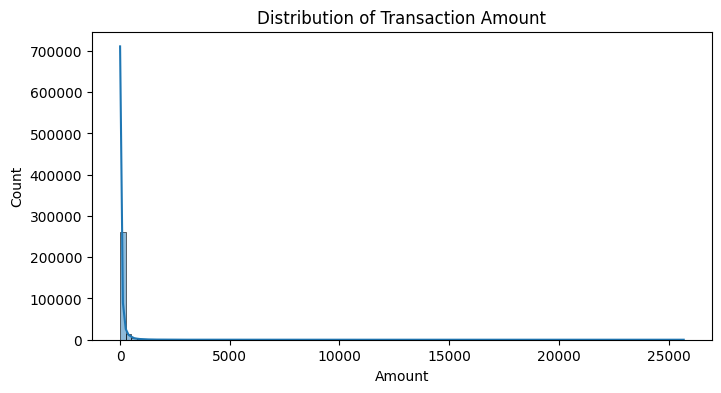

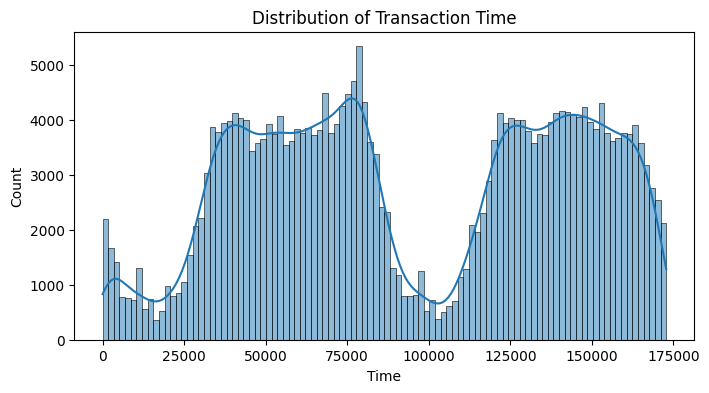

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Amount
plt.figure(figsize=(8, 4))
sns.histplot(data['Amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amount")
plt.show()

# Distribution of Time
plt.figure(figsize=(8, 4))
sns.histplot(data['Time'], bins=100, kde=True)
plt.title("Distribution of Transaction Time")
plt.show()


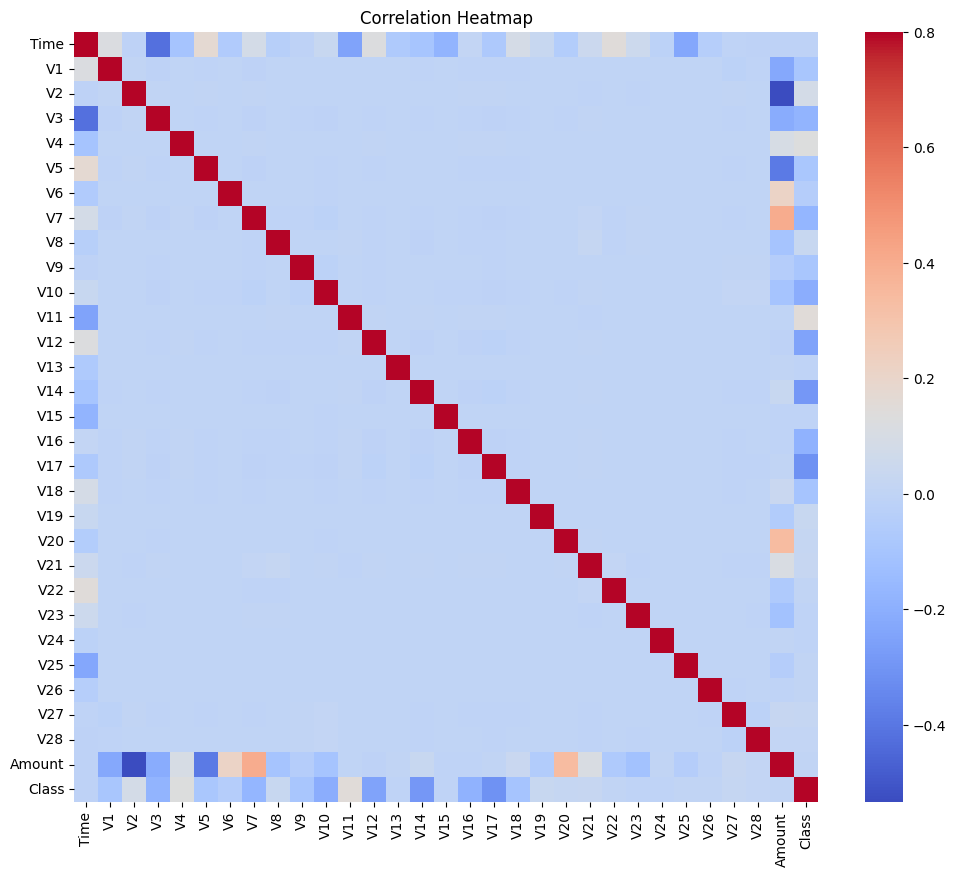

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm', vmax=0.8)
plt.title("Correlation Heatmap")
plt.show()


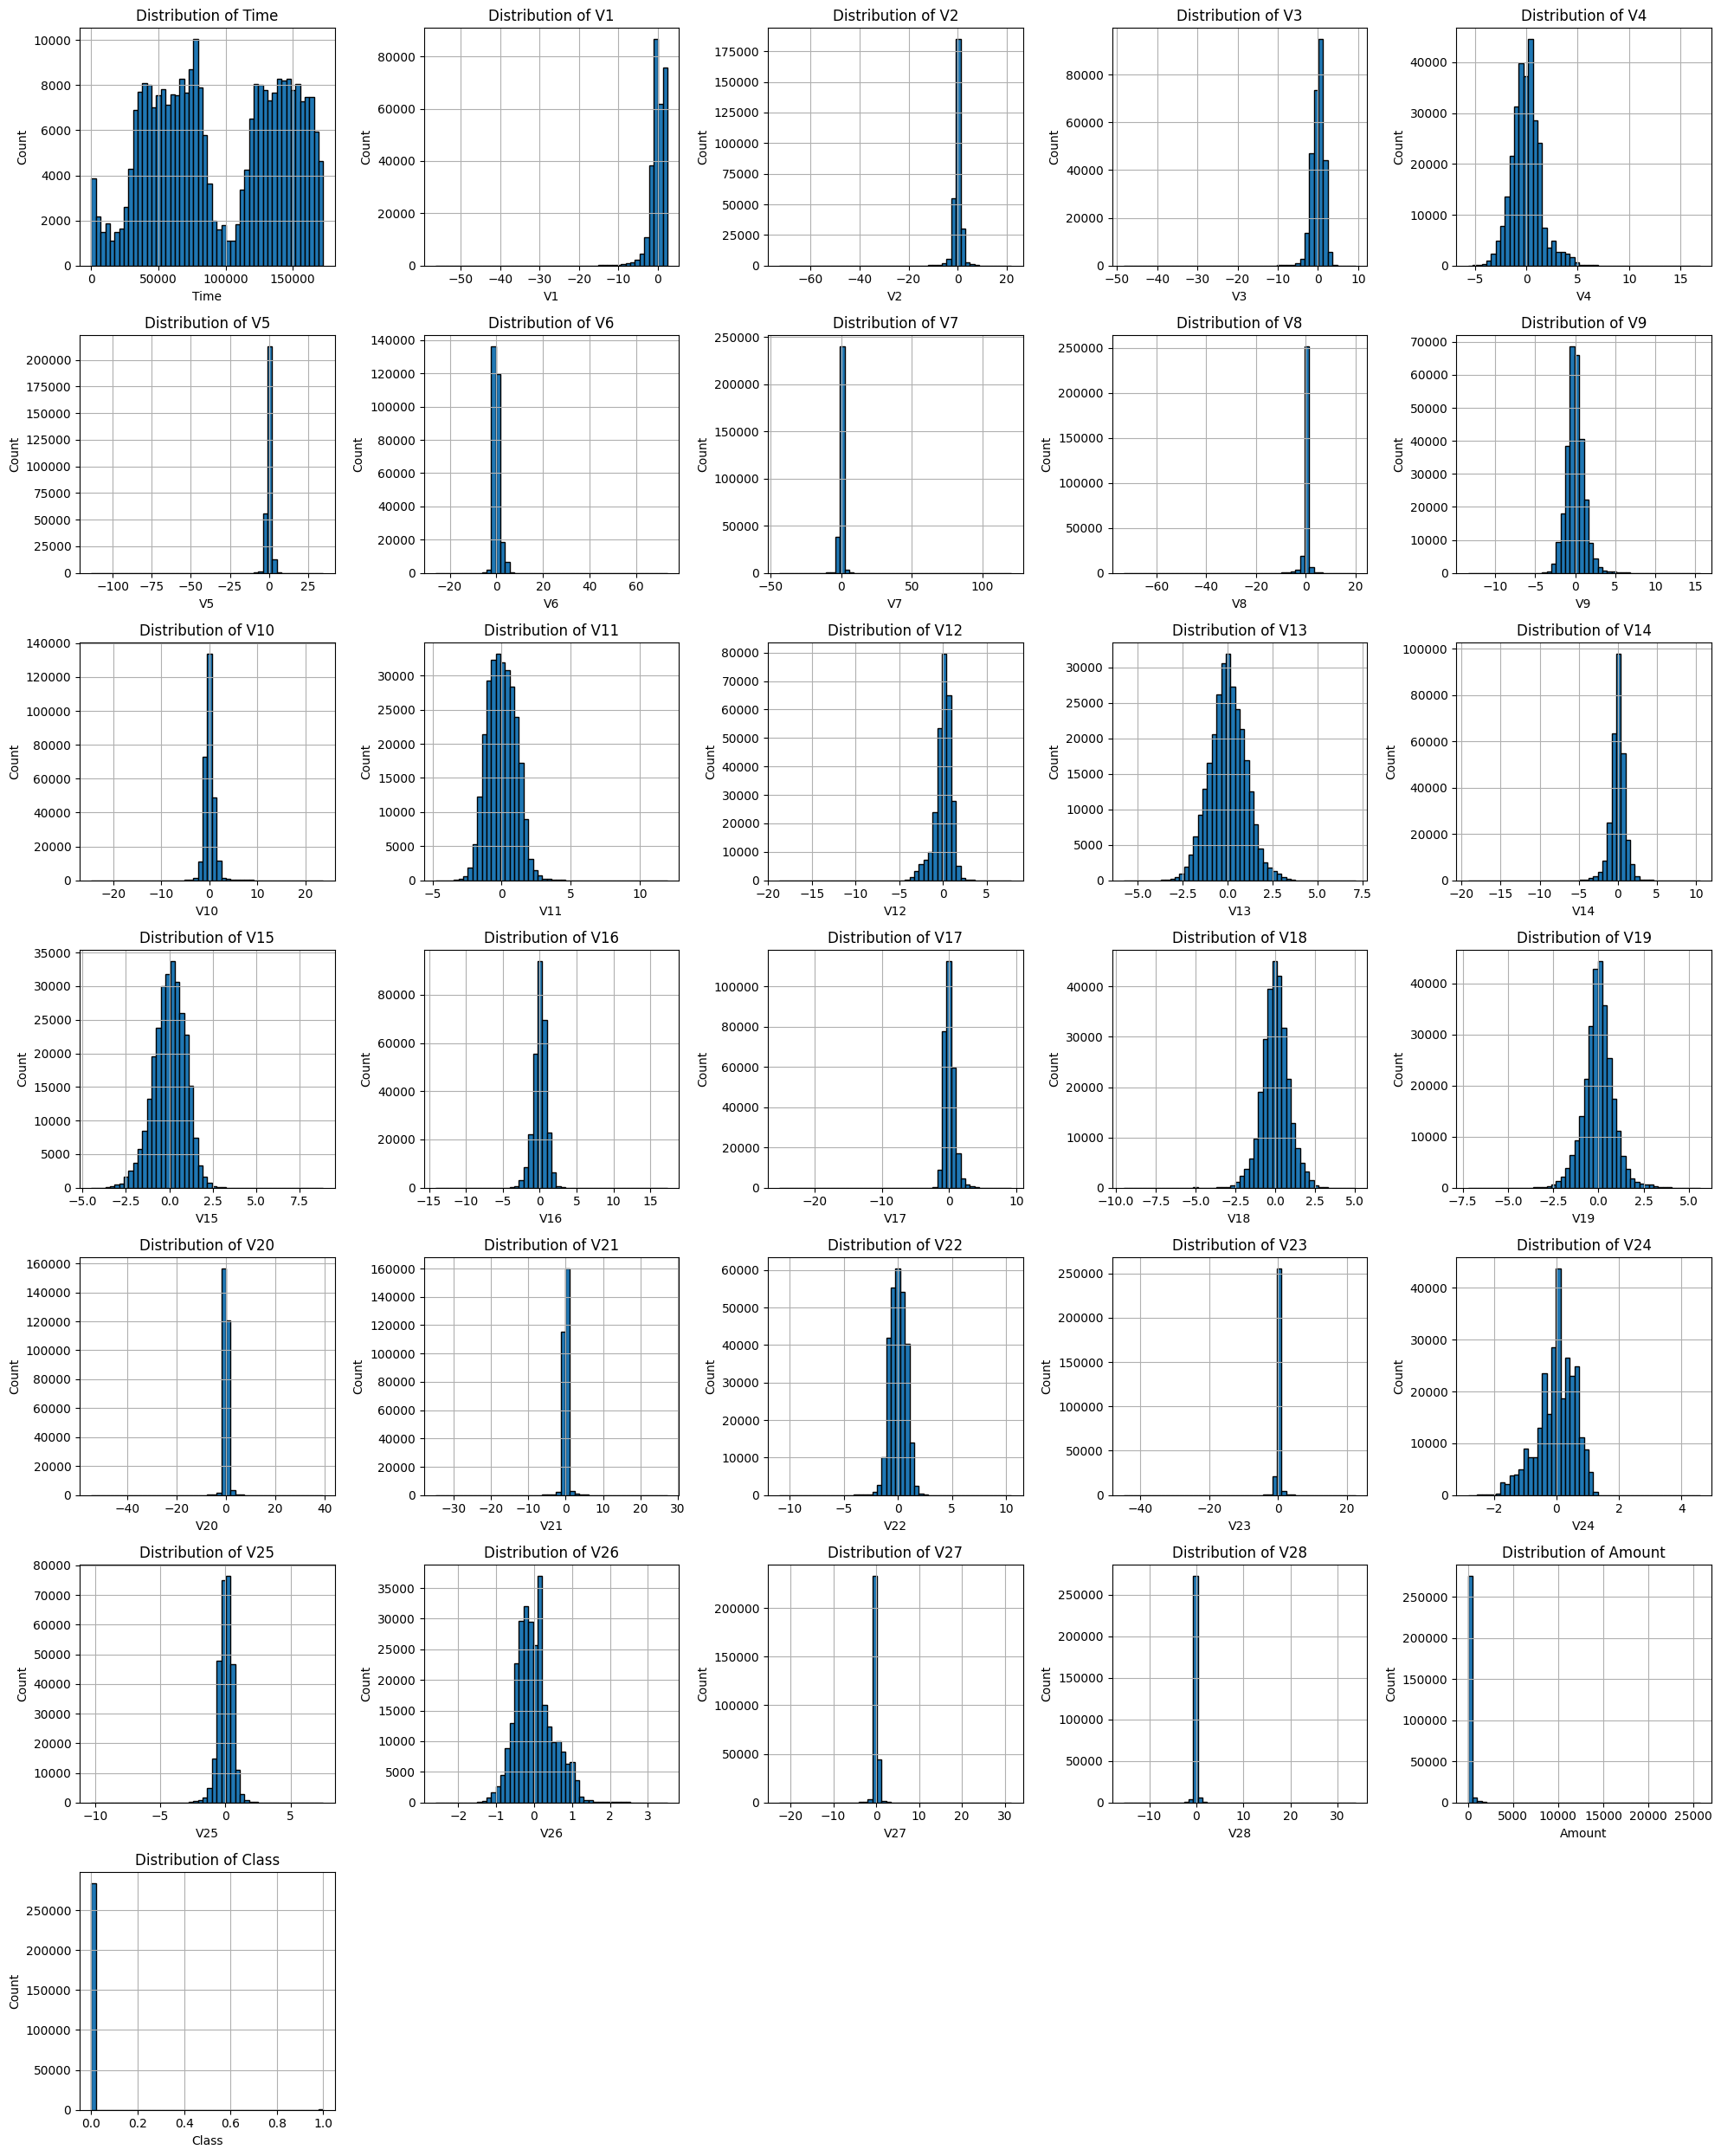

In [23]:
import matplotlib.pyplot as plt

# Get all numerical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(7, 5, i+1)
    data[col].hist(bins=50, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [24]:
# Get absolute correlation with target
correlations = data.corr()['Class'].abs().sort_values(ascending=False)

# Top correlated features (excluding 'Class' itself)
top_features = correlations[1:11]  # Get top 10 features correlated with fraud
print(top_features)


V17    0.313498
V14    0.293375
V12    0.250711
V10    0.206971
V16    0.187186
V3     0.182322
V7     0.172347
V11    0.149067
V4     0.129326
V18    0.105340
Name: Class, dtype: float64


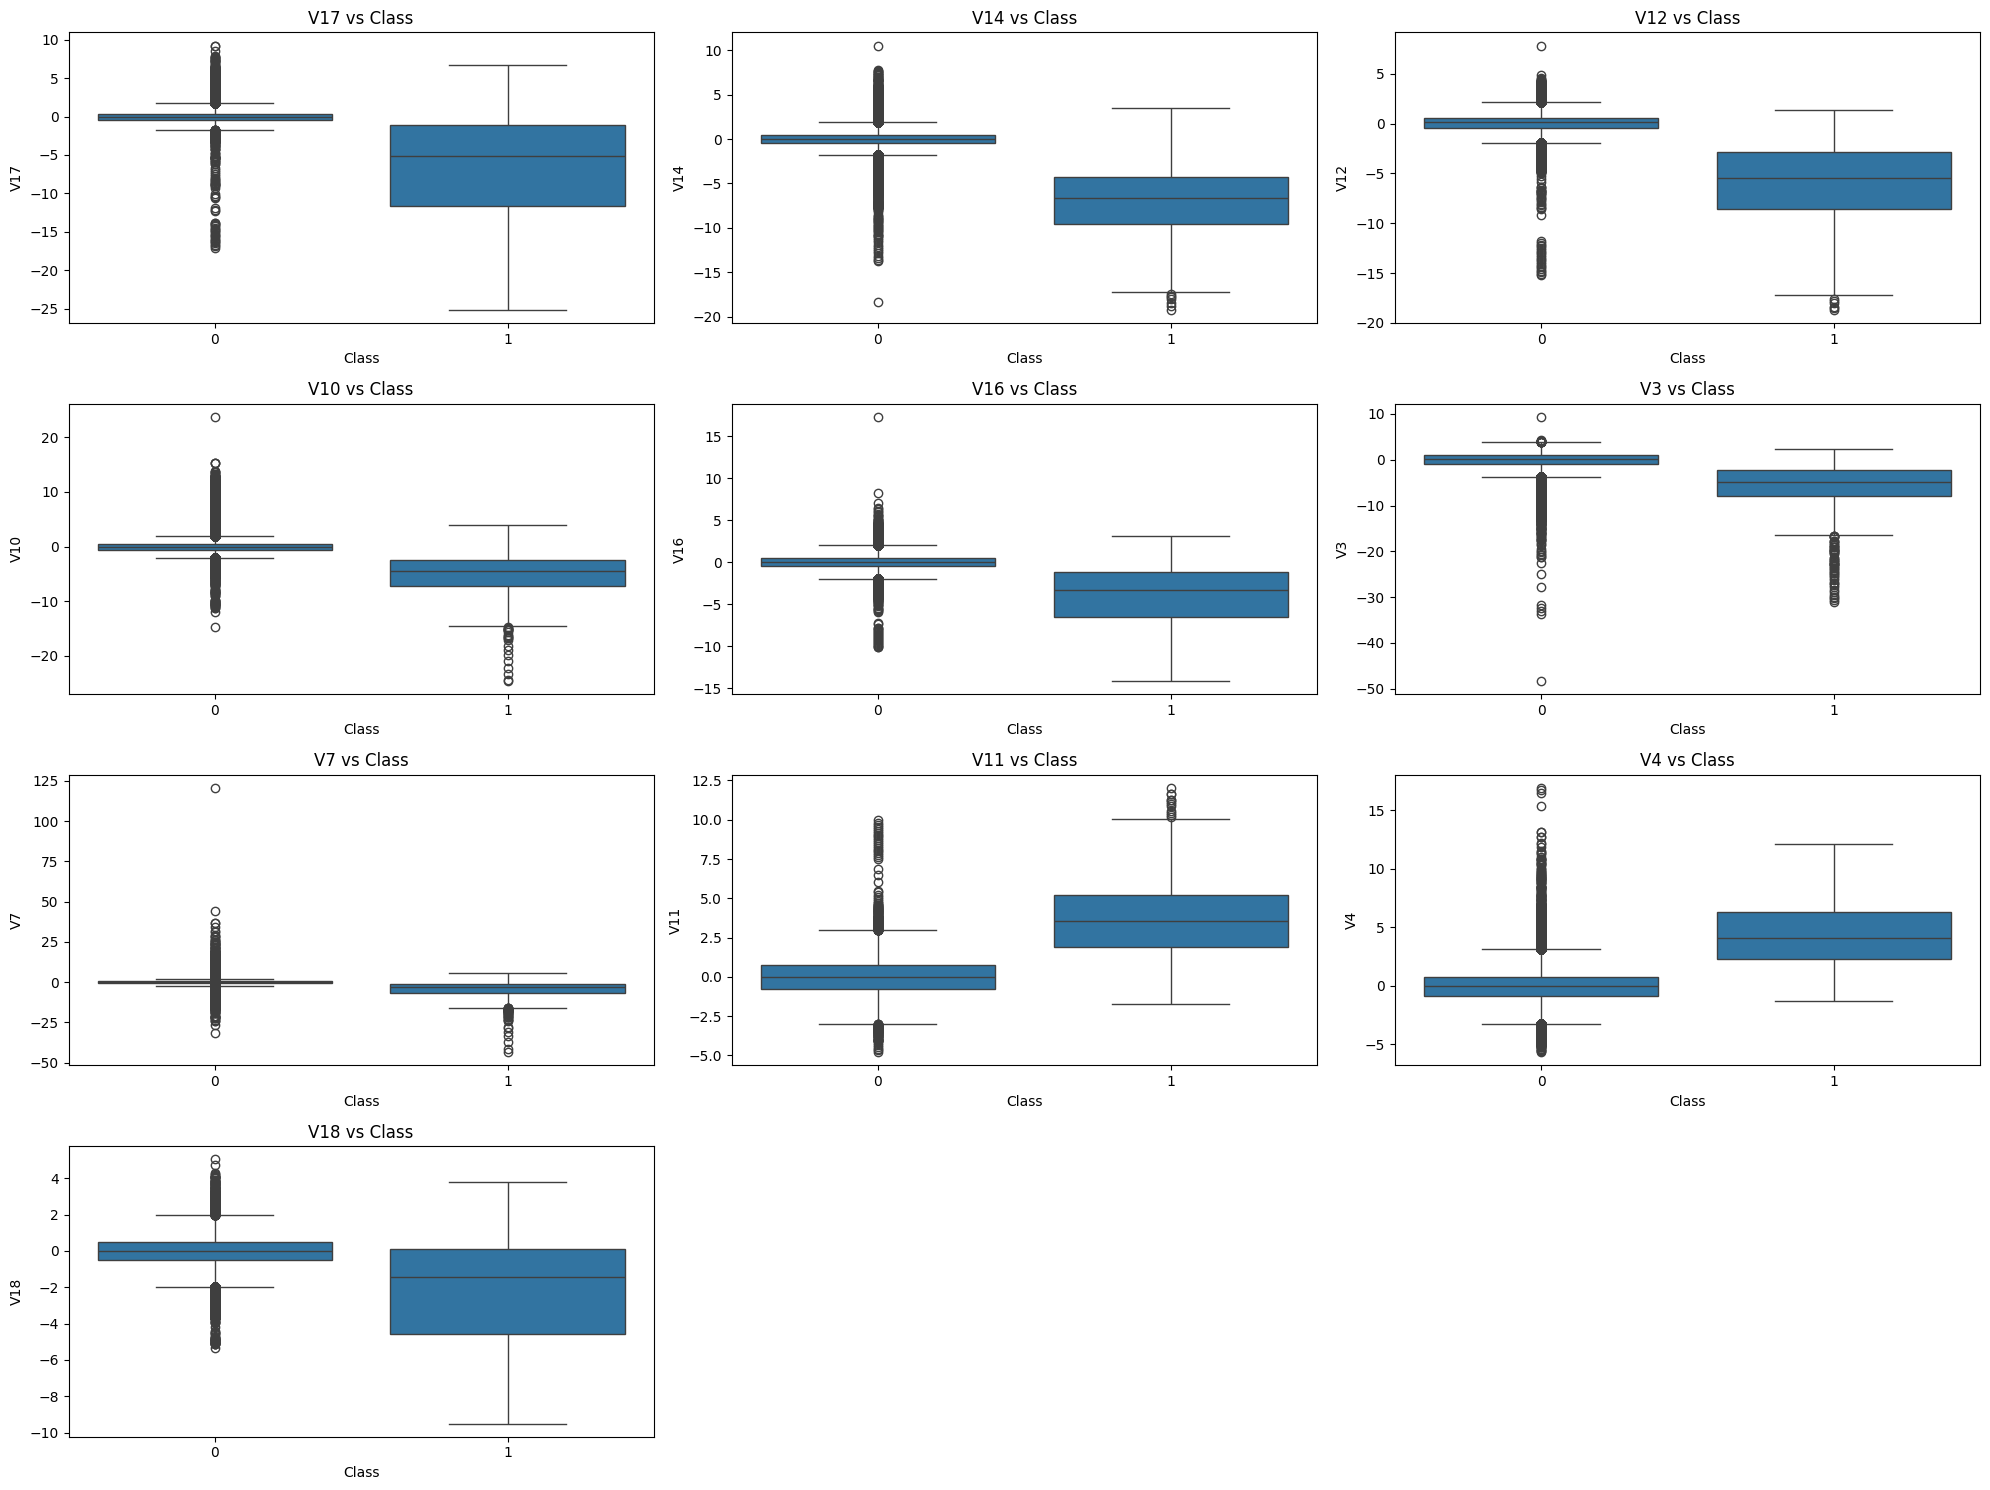

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

top_features = ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(top_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split into train/test before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [27]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample training data only (not test)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution


In [28]:
print("After resampling:")
print(y_train_resampled.value_counts())


After resampling:
Class
0    226602
1    226602
Name: count, dtype: int64


In [29]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()

# Only fit on training data to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Then refit the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# Predict again
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [30]:
import joblib

# Save X_train and y_train
joblib.dump(X_train, '../data/X_train.pkl')
joblib.dump(y_train, '../data/y_train.pkl')


['../data/y_train.pkl']

In [31]:
import joblib
joblib.dump(scaler, '../models/standard_scaler.pkl')

['../models/standard_scaler.pkl']

In [32]:
import joblib


scaler = joblib.load('../models/standard_scaler.pkl')



In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[56176   475]
 [   14    81]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.15      0.85      0.25        95

    accuracy                           0.99     56746
   macro avg       0.57      0.92      0.62     56746
weighted avg       1.00      0.99      0.99     56746



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix (Random Forest):
[[56642     9]
 [   22    73]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit on the resampled & scaled training set
xgb_model.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


d:\Data science\New big end to end\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:43:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix (XGBoost):
[[56638    13]
 [   19    76]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.80      0.83        95

    accuracy                           1.00     56746
   macro avg       0.93      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [36]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report

# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Fit model on scaled resampled training data
lgb_model.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix (LightGBM):")
print(confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb, digits=2))



[LightGBM] [Info] Number of positive: 226602, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 453204, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix (LightGBM):
[[56613    38]
 [   21    74]]

Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.66      0.78      0.71        95

    accuracy                           1.00     56746
   macro avg       0.83      0.89      0.86     56746
weighted avg       1.00      1.00      1.00     56746



In [37]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# Define parameter grid
param_grid = {
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Create model
lgb_clf = LGBMClassifier(random_state=42)

# Randomized search
rand_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_grid,
    n_iter=25,  # Can increase for better results
    cv=3,
    scoring='f1',  # You can also try 'roc_auc'
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit
rand_search.fit(X_train_scaled, y_train_resampled)

# Best model
best_lgb = rand_search.best_estimator_

# Evaluate on test set
from sklearn.metrics import classification_report, confusion_matrix

y_pred_best = best_lgb.predict(X_test_scaled)

print("Confusion Matrix (Tuned LightGBM):")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report (Tuned LightGBM):")
print(classification_report(y_test, y_pred_best, digits=2))


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[LightGBM] [Info] Number of positive: 226602, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 453204, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

C:\Users\zaect\AppData\Local\Temp\ipykernel_10040\1770365050.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')


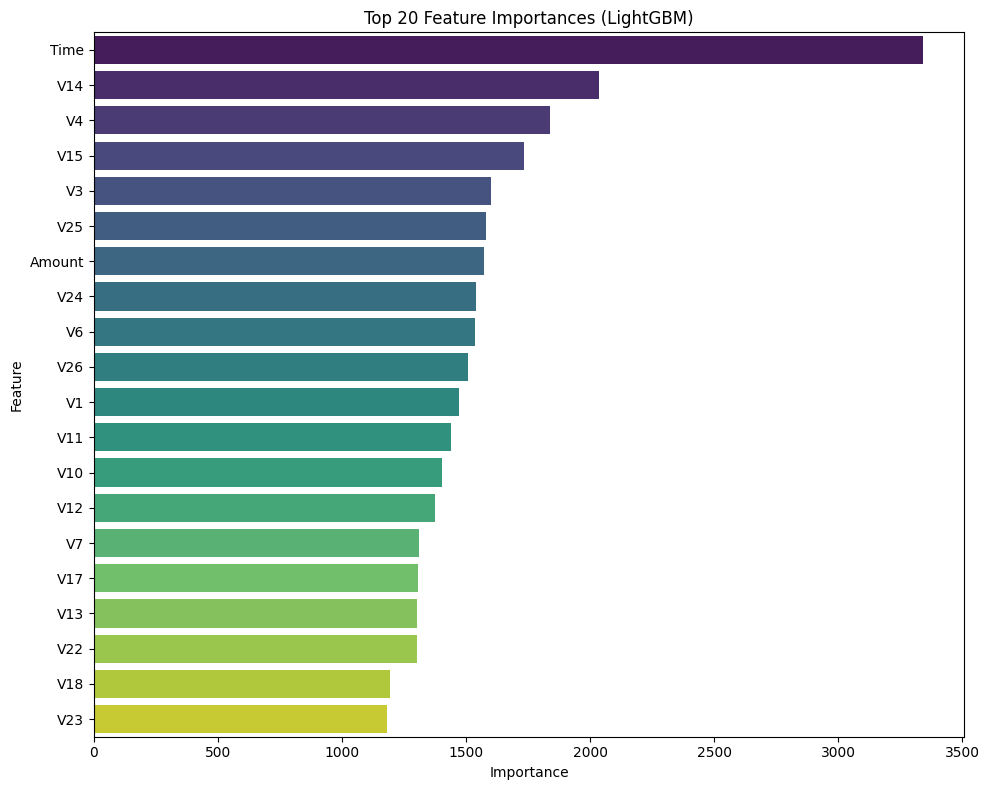

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 20 important features
importances = best_lgb.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
plt.title("Top 20 Feature Importances (LightGBM)")
plt.tight_layout()
plt.show()


In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgb', LGBMClassifier(random_state=42))
]

# Meta learner
meta_learner = LogisticRegression(max_iter=1000)

# Stacking model
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=3)

# Train
stacked_model.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred_stack = stacked_model.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix (Stacked Model):")
print(confusion_matrix(y_test, y_pred_stack))

print("\nClassification Report (Stacked Model):")
print(classification_report(y_test, y_pred_stack, digits=2))


d:\Data science\New big end to end\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [13:30:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 226602, number of negative: 226602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 453204, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


d:\Data science\New big end to end\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:01:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Data science\New big end to end\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:02:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Data science\New big end to end\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:02:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 151068, number of negative: 151068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 302136, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 151068, number of negative: 151068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 302136, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 151068, number

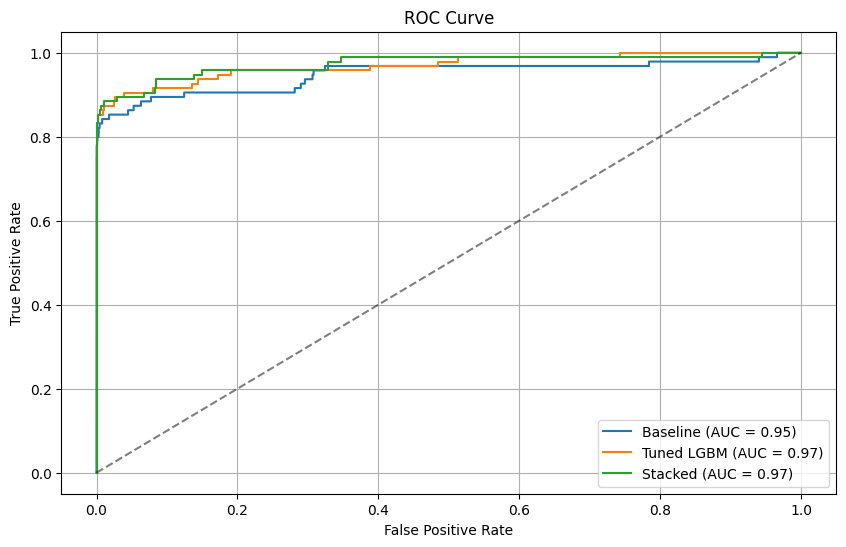

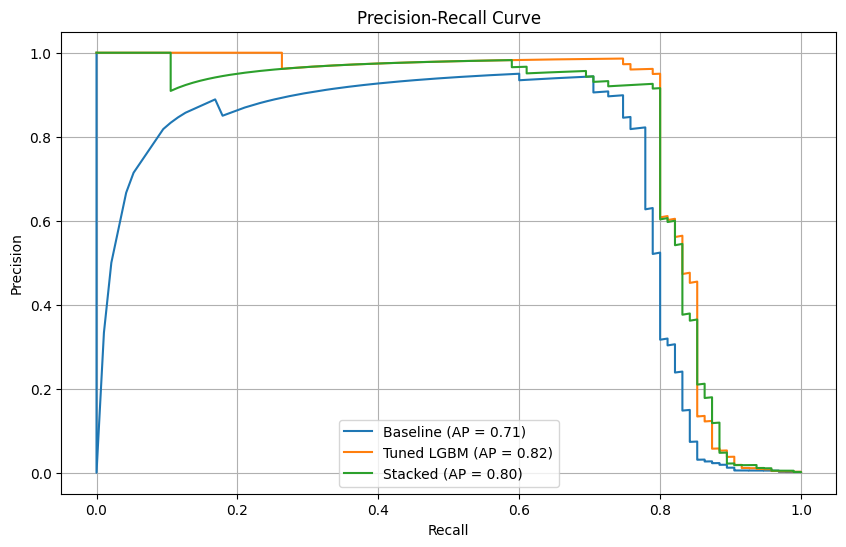

In [40]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
# Get predicted probabilities
y_proba_baseline = lgb_model.predict_proba(X_test_scaled)[:, 1]
y_proba_tuned = best_lgb.predict_proba(X_test_scaled)[:, 1]
y_proba_stacked = stacked_model.predict_proba(X_test_scaled)[:, 1]

# ROC curves
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_baseline)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_proba_stacked)

# Precision-Recall curves
prec_base, rec_base, _ = precision_recall_curve(y_test, y_proba_baseline)
prec_tuned, rec_tuned, _ = precision_recall_curve(y_test, y_proba_tuned)
prec_stack, rec_stack, _ = precision_recall_curve(y_test, y_proba_stacked)

# ROC AUC scores
auc_base = roc_auc_score(y_test, y_proba_baseline)
auc_tuned = roc_auc_score(y_test, y_proba_tuned)
auc_stack = roc_auc_score(y_test, y_proba_stacked)

# Average precision scores
ap_base = average_precision_score(y_test, y_proba_baseline)
ap_tuned = average_precision_score(y_test, y_proba_tuned)
ap_stack = average_precision_score(y_test, y_proba_stacked)

# --- Plot ROC ---
plt.figure(figsize=(10, 6))
plt.plot(fpr_base, tpr_base, label=f'Baseline (AUC = {auc_base:.2f})')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned LGBM (AUC = {auc_tuned:.2f})')
plt.plot(fpr_stack, tpr_stack, label=f'Stacked (AUC = {auc_stack:.2f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# --- Plot Precision-Recall ---
plt.figure(figsize=(10, 6))
plt.plot(rec_base, prec_base, label=f'Baseline (AP = {ap_base:.2f})')
plt.plot(rec_tuned, prec_tuned, label=f'Tuned LGBM (AP = {ap_tuned:.2f})')
plt.plot(rec_stack, prec_stack, label=f'Stacked (AP = {ap_stack:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [41]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define function to evaluate a model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

# Evaluate each model
results = []

results.append(evaluate_model("Baseline LightGBM", lgb_model, X_test_scaled, y_test))
results.append(evaluate_model("Tuned LightGBM", best_lgb, X_test_scaled, y_test))
results.append(evaluate_model("Stacked Model", stacked_model, X_test_scaled, y_test))

# Convert to DataFrame for comparison
results_df = pd.DataFrame(results)
print(results_df)


               Model  Accuracy  Precision    Recall  F1-Score
0  Baseline LightGBM  0.998960   0.660714  0.778947  0.714976
1     Tuned LightGBM  0.999559   0.926829  0.800000  0.858757
2      Stacked Model  0.999524   0.914634  0.789474  0.847458


In [42]:
import joblib
joblib.dump(best_lgb,'../models/tuned_lightgbm_model.pkl')

['../models/tuned_lightgbm_model.pkl']

In [45]:
joblib.dump(X_test, '../data/X_test.pkl')
joblib.dump(y_test, '../data/y_test.pkl')


['../data/y_test.pkl']

In [47]:
import pandas as pd

# Load the original dataset (adjust path as needed)
df = pd.read_csv('../data/creditcard.csv')

# Select some fraud cases (Class == 1)
fraud_samples = df[df['Class'] == 1].head(3)  # pick first 3 fraud cases

# Select some non-fraud cases (Class == 0)
nonfraud_samples = df[df['Class'] == 0].head(3)  # pick first 3 non-fraud cases

# Combine them
test_samples = pd.concat([fraud_samples, nonfraud_samples])

print(test_samples)


        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
0        0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
0     0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1    -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2     0.791461  0.247676 -1.5